In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [21]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [22]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.55807555 0.51101667 0.526703  ]
  [0.55458844 0.5075296  0.5232159 ]
  [0.5511013  0.50404245 0.5197287 ]
  ...
  [0.670455   0.64692557 0.66261184]
  [0.6727351  0.6492057  0.66489196]
  [0.6490006  0.6254711  0.64115745]]

 [[0.57142246 0.52436364 0.5400499 ]
  [0.5749096  0.5278508  0.5435371 ]
  [0.5783967  0.53133786 0.54702413]
  ...
  [0.6731671  0.6496377  0.665324  ]
  [0.6702167  0.64668727 0.66237354]
  [0.64919424 0.62566483 0.6413511 ]]

 [[0.55473745 0.5076786  0.5233649 ]
  [0.5516378  0.504579   0.5202653 ]
  [0.5485382  0.5014793  0.5171656 ]
  ...
  [0.6758793  0.6523499  0.66803616]
  [0.6676982  0.6441688  0.65985507]
  [0.649388   0.6258586  0.6415449 ]]

 ...

 [[0.5902907  0.5471535  0.56283975]
  [0.5979686  0.5548313  0.5705176 ]
  [0.5866854  0.54354817 0.55923444]
  ...
  [0.6227544  0.5953034  0.6227544 ]
  [0.6231419  0.5956909  0.6231419 ]
  [0.6235293  0.59607834 0.6235293 ]]

 [[0.59125936 0.5481221  0.5638084 ]
  [0.59699994 0.55386263 0.56954896]


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [15]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
1506/32


47.0625

In [13]:
215/32

6.71875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 60s 1s/step - loss: 0.9735 - accuracy: 0.4310 - val_loss: 0.9022 - val_accuracy: 0.4635
Epoch 2/20
47/47 [==============================] - 52s 1s/step - loss: 0.7946 - accuracy: 0.6008 - val_loss: 0.5775 - val_accuracy: 0.7396
Epoch 3/20
47/47 [==============================] - 54s 1s/step - loss: 0.5633 - accuracy: 0.7375 - val_loss: 0.5016 - val_accuracy: 0.7812
Epoch 4/20
47/47 [==============================] - 59s 1s/step - loss: 0.3827 - accuracy: 0.8462 - val_loss: 0.3089 - val_accuracy: 0.8750
Epoch 5/20
47/47 [==============================] - 60s 1s/step - loss: 0.3381 - accuracy: 0.8732 - val_loss: 0.3904 - val_accuracy: 0.8333
Epoch 6/20
47/47 [==============================] - 55s 1s/step - loss: 0.2851 - accuracy: 0.8848 - val_loss: 0.3397 - val_accuracy: 0.8750
Epoch 7/20
47/47 [==============================] - 56s 1s/step - loss: 0.3626 - accuracy: 0.8565 - val_loss: 0.2707 - val_accuracy: 0.8854
Epoch 8/20
47/47 [==

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

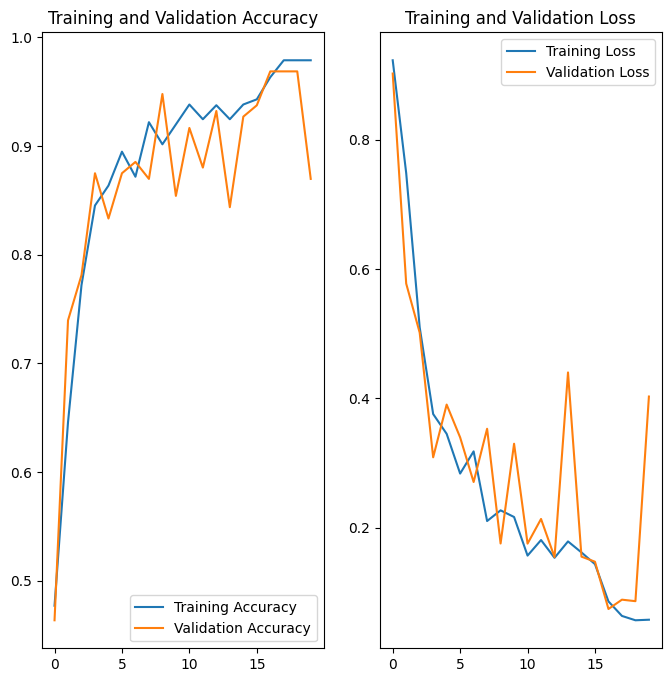

In [18]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


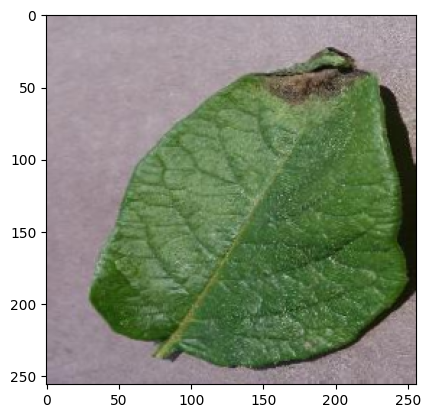

In [25]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [26]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

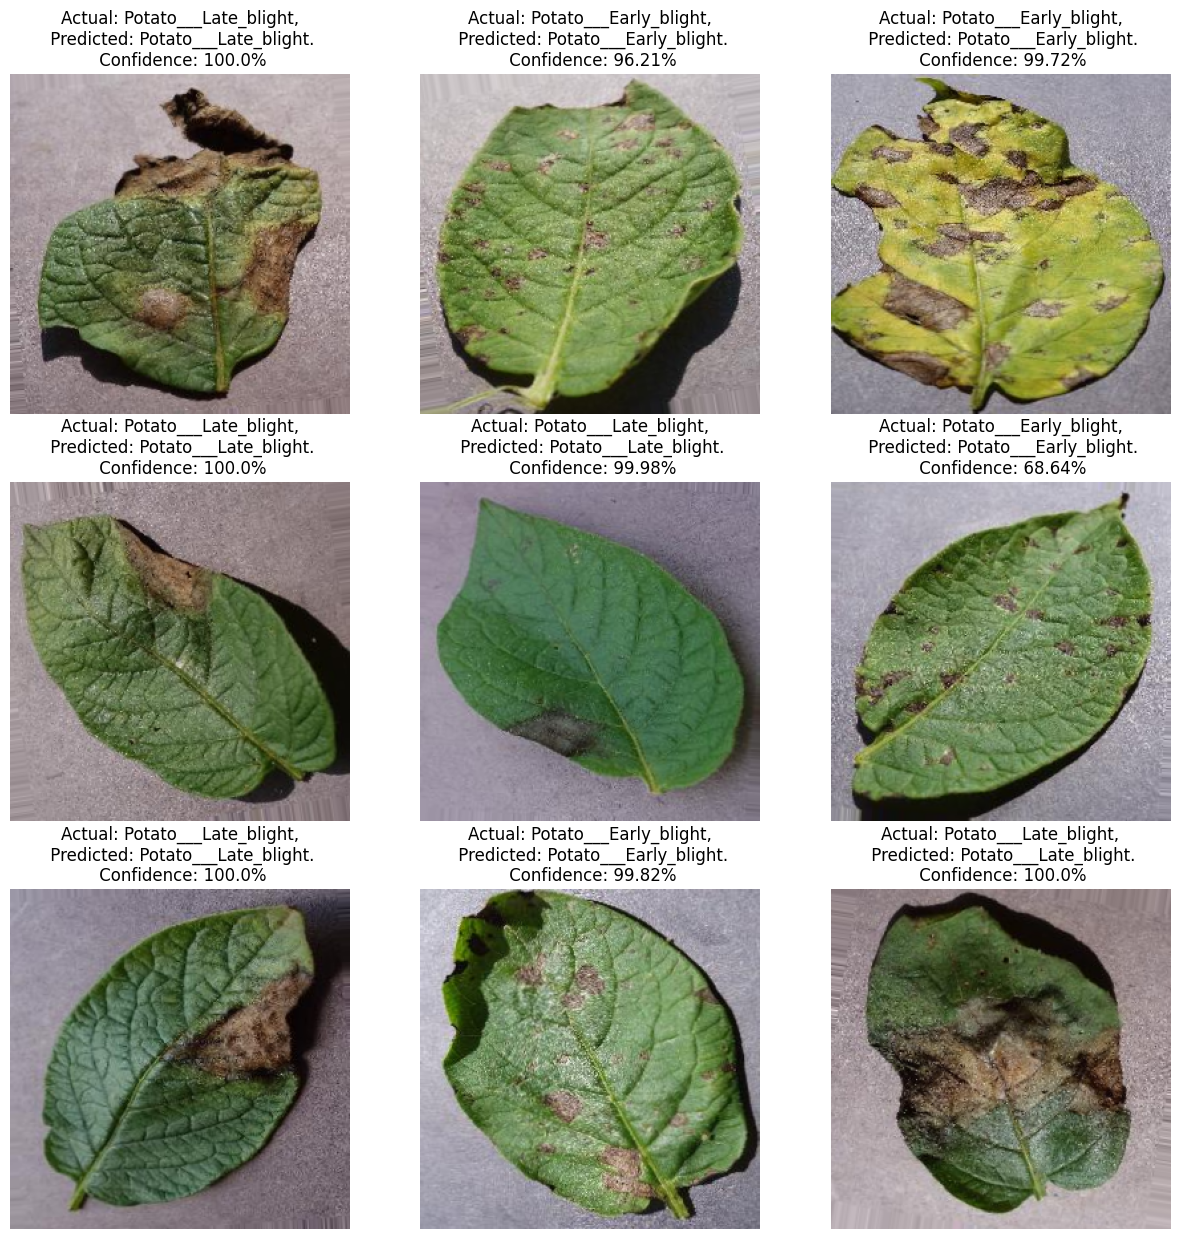

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [28]:
model.save("../potatoes.h5")